## Step 1 : Understanding And Reading the data

### A. Importing the required libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score    
from sklearn.metrics import mean_squared_error

##### Importing the Dataset

In [4]:
df=pd.read_csv("day (1).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking for null values in dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
#There is no null values in dataset

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### B.Data Cleaning

In [10]:
#from the above dataset, the instant is an index column so we can drop it

df.drop(['instant'],axis=1,inplace=True)

In [11]:
#As dteday and yr & month are having same data so we can drop it

df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#AS the features casual & registered = cnt 
#cnt is our target variable so we will not consider casual and registered

df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Checking the correlation between temp and atemp
df[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


In [16]:
# As we can see that temp and atemp  are highly correlated we have to drop ont of the feature
# So drop atemp

In [17]:
df = df.drop(columns=['atemp'])

### C. Visualizing Categorical Variables¶

In [19]:
#To checking the features present in dataset
print(df.columns)


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [13]:
#check now the simplified datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [20]:
#from the data we can see that the features like
# season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables

In [21]:
# replacing it with proper values

In [22]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [23]:
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,5,1,1,9.305237,43.6957,12.522300,1600


In [25]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [26]:
df.weathersit = df.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [27]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


### Step 2 : Exploratary Data Analysis

In [30]:
# Plotting pair plot

In [28]:
num_vars=['temp', 'hum', 'windspeed', 'cnt']

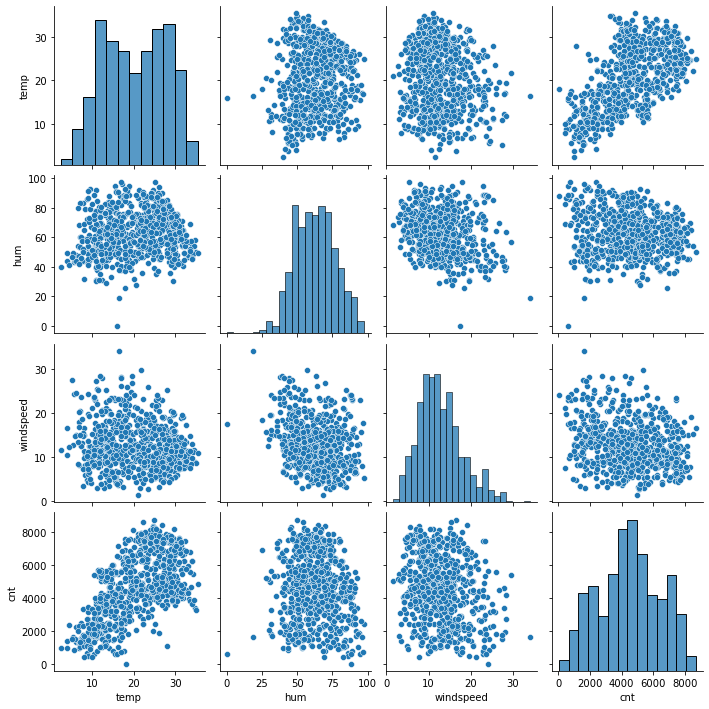

In [29]:
sns.pairplot(df[num_vars])
plt.show()

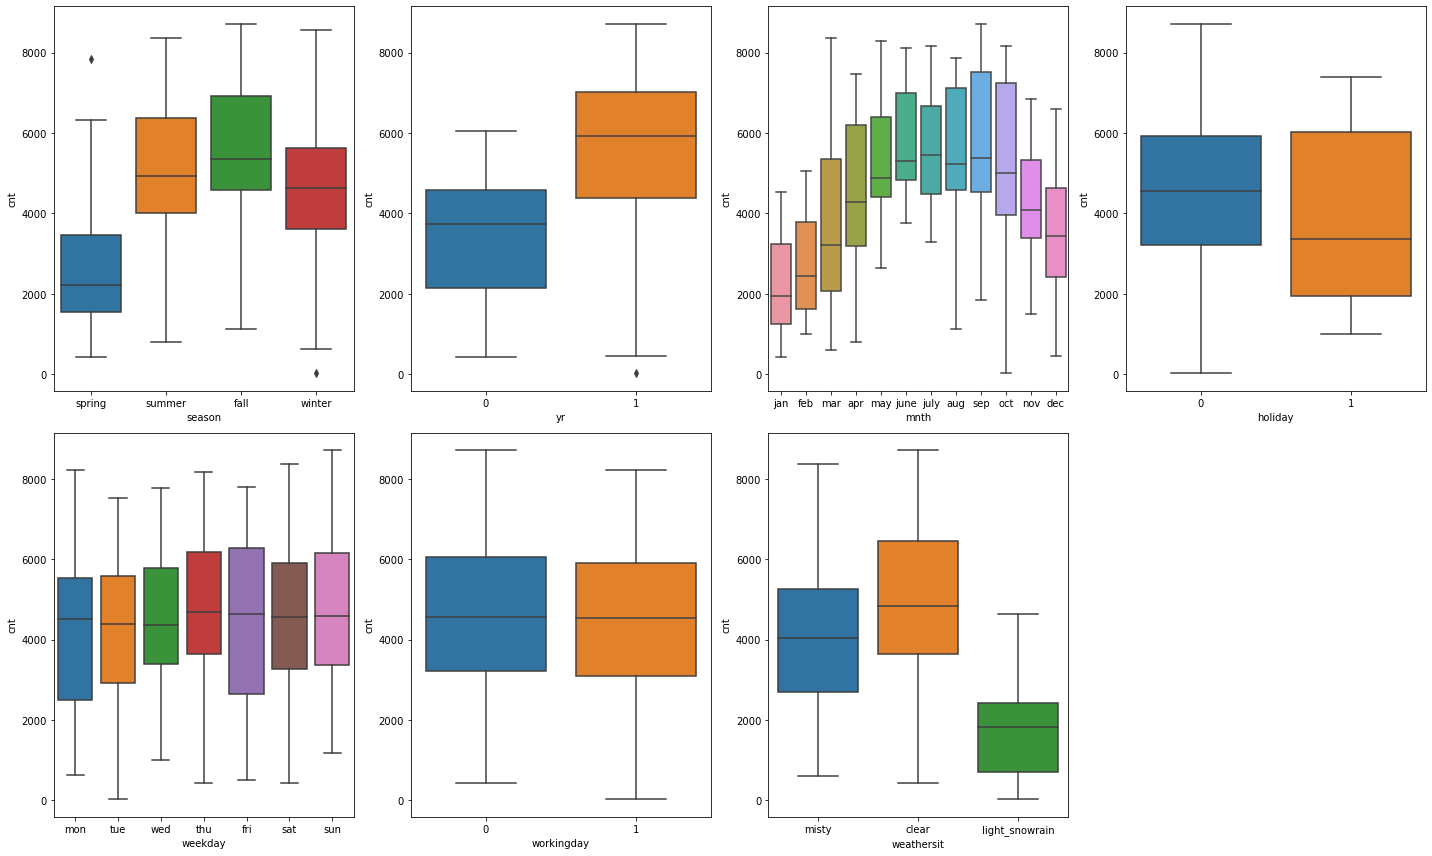

In [33]:
# Plotting Categorical variables with Target variable 'cnt'
cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.tight_layout()
plt.show()


### Correlation

<AxesSubplot:>

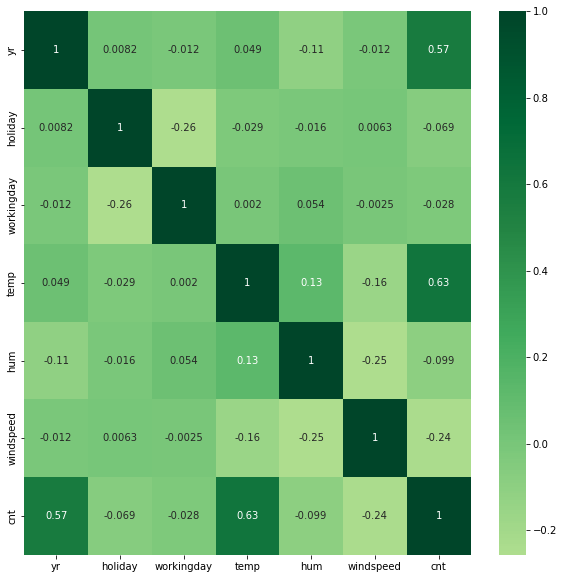

In [48]:
# correlation Checking of Features
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),cmap='YlGn',center=0,annot=True)

## Step:3 Preparing the Data for Modelling¶

### A. Encoding

#### Creating dummy variables

In [49]:
months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [50]:
df_1 = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [51]:
df_1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [52]:
df_1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df_1.shape

(730, 29)

In [55]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

### B. Test-Train Split

In [58]:
# Importing Libraries

In [60]:
# Splitting the data into train and test subsets
np.random.seed(0)
df_train,df_test=train_test_split(df_1,train_size=0.7,random_state=100)

In [61]:
df_train.shape

(510, 29)

In [62]:
df_test.shape

(220, 29)

### C. Rescaling

In [64]:
#Importing MinMaxScaler library

In [65]:
scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Training the Model

##### A. CREATING X AND Y

In [66]:

y_train = df_train.pop('cnt')
X_train = df_train

In [69]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [68]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


#### B. Selecting features using RFE

In [71]:
# Importing RFE & LinearRegression Library

In [76]:
# Selecting 15 Features using RFE 

lr = LinearRegression()

rfe = RFE(lr,n_features_to_select=15, step=1)

rfe = rfe.fit(X_train,y_train)

In [77]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [78]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'light_snowrain', 'misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [80]:
X_train_rfe = X_train[col]

## 5.Building Model

In [82]:
#Importing Statsmodel & VIF Libraries

### Model 1

In [83]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


In [84]:
#Add a Constat
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm1)

In [88]:
#fit
lr_model1 = lr.fit()

# Check the parameters obtained

lr_model1.params

const             0.319667
yr                0.230404
holiday          -0.091089
temp              0.481503
hum              -0.162213
windspeed        -0.188726
dec              -0.035461
jan              -0.043411
july             -0.055250
nov              -0.038701
sep               0.075467
light_snowrain   -0.246481
misty            -0.054300
spring           -0.061255
summer            0.042337
winter            0.101921
dtype: float64

In [89]:
#Checking Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          8.15e-189
Time:                        22:43:17   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.859      0.000       0.249       0.391
yr                 0.2304      0.008     28.487      0.000       0.215       0.246
holiday           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp               0.4815      0.037     13.005      0.000       0.409       0.554
hum               -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed         -0.1887      0.026     -7.315      0.000      -0.239      -0.138
dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep                0.0755      0.017      4.466      0.000       0.042       0.109
light_snowrain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
misty             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer             0.0423      0.015      2.761      0.006       0.012       0.072
winter             0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

In [90]:
#As 'Hum' has much higher VIF it is better to drop it

In [91]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,misty,1.57


In [94]:
#Add a Constat
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm2)

#fit
lr_model2 = lr.fit()

#Checking Summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          4.75e-186
Time:                        22:50:35   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.618      0.000       0.182       0.308
yr                 0.2345      0.008     28.687      0.000       0.218       0.251
holiday           -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp               0.4387      0.036     12.093      0.000       0.367       0.510
windspeed         -0.1585      0.025     -6.276      0.000      -0.208      -0.109
dec               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan               -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep                0.0687      0.017      4.015      0.000       0.035       0.102
light_snowrain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
misty             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer             0.0349      0.015      2.251      0.025       0.004       0.065
winter             0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3


In [96]:
#As 'temp' has much higher VIF it is better to drop it
X_train_rfe = X_train_rfe.drop(["temp"], axis = 1)

In [97]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.89
10,spring,2.89
12,winter,2.85
11,summer,2.02
0,yr,1.83
6,nov,1.80
4,jan,1.64
9,misty,1.53
3,dec,1.46
5,july,1.20


In [98]:
#Add a Constat
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm3)

#fit
lr_model3 = lr.fit()

#Checking Summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.82e-159
Time:                        22:58:13   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5954      0.016     37.460      0.000       0.564       0.627
yr                 0.2457      0.009     26.616      0.000       0.228       0.264
holiday           -0.0855      0.030     -2.887      0.004      -0.144      -0.027
windspeed         -0.1902      0.029     -6.662      0.000      -0.246      -0.134
dec               -0.1086      0.019     -5.660      0.000      -0.146      -0.071
jan               -0.1202      0.020     -6.056      0.000      -0.159      -0.081
july              -0.0182      0.021     -0.875      0.382      -0.059       0.023
nov               -0.0995      0.021     -4.731      0.000      -0.141      -0.058
sep                0.0534      0.019      2.750      0.006       0.015       0.092
light_snowrain    -0.3117      0.028    -11.150      0.000      -0.367      -0.257
misty             -0.0869      0.010     -8.800      0.000      -0.106      -0.068
spring            -0.2503      0.018    -14.125      0.000      -0.285      -0.216
summer            -0.0497      0.016     -3.160      0.002      -0.081      -0.019
winter            -0.0231      0.018     -1.307      0.192      -0.058       0.012
==============================================================================
Omnibus:                       56.274   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.272
Skew:                          -0.588   Prob(JB):                     1.89e-29
Kurtosis:                       5.200   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4

In [100]:
#As "july" & "winter" has higher p value it is better to drop it
X_train_rfe = X_train_rfe.drop(["july","winter"], axis = 1)

In [101]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.23
9,spring,2.37
0,yr,1.74
10,summer,1.70
4,jan,1.62
8,misty,1.48
5,nov,1.23
6,sep,1.16
3,dec,1.13
7,light_snowrain,1.07


In [102]:
#Add a Constat
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm4)

#fit
lr_model4 = lr.fit()

#Checking Summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.71e-161
Time:                        23:00:57   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5834      0.013     44.987      0.000       0.558       0.609
yr                 0.2459      0.009     26.646      0.000       0.228       0.264
holiday           -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed         -0.1910      0.029     -6.694      0.000      -0.247      -0.135
dec               -0.1166      0.017     -6.689      0.000      -0.151      -0.082
jan               -0.1216      0.020     -6.143      0.000      -0.160      -0.083
nov               -0.1101      0.018     -6.120      0.000      -0.145      -0.075
sep                0.0607      0.018      3.304      0.001       0.025       0.097
light_snowrain    -0.3155      0.028    -11.374      0.000      -0.370      -0.261
misty             -0.0872      0.010     -8.883      0.000      -0.106      -0.068
spring            -0.2367      0.015    -16.212      0.000      -0.265      -0.208
summer            -0.0374      0.013     -2.937      0.003      -0.062      -0.012
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5


In [103]:
#As 'windspeed' has much higher VIF it is better to drop it
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)

In [104]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,spring,1.84
3,jan,1.61
0,yr,1.55
7,misty,1.44
9,summer,1.31
4,nov,1.12
5,sep,1.12
2,dec,1.10
1,holiday,1.06
6,light_snowrain,1.03


In [105]:
#Add a Constat
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm5)

#fit
lr_model5 = lr.fit()

#Checking Summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          3.79e-153
Time:                        23:04:10   Log-Likelihood:                 415.91
No. Observations:                 510   AIC:                            -809.8
Df Residuals:                     499   BIC:                            -763.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5309      0.011     49.274      0.000       0.510       0.552
yr                 0.2452      0.010     25.469      0.000       0.226       0.264
holiday           -0.0879      0.031     -2.844      0.005      -0.149      -0.027
dec               -0.1109      0.018     -6.108      0.000      -0.147      -0.075
jan               -0.1062      0.021     -5.178      0.000      -0.146      -0.066
nov               -0.1189      0.019     -6.349      0.000      -0.156      -0.082
sep                0.0662      0.019      3.461      0.001       0.029       0.104
light_snowrain    -0.3349      0.029    -11.639      0.000      -0.391      -0.278
misty             -0.0861      0.010     -8.412      0.000      -0.106      -0.066
spring            -0.2616      0.015    -17.771      0.000      -0.291      -0.233
summer            -0.0521      0.013     -3.988      0.000      -0.078      -0.026
==============================================================================
Omnibus:                       68.305   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.368
Skew:                          -0.637   Prob(JB):                     8.41e-44
Kurtosis:                       5.777   Cond. No.                         8.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From Above Summary it can be concluded that the all VIF's are within 2 and 'p' values are also 0
##### So we can stop here

## 6.Residual Analysis

In [107]:
y_train_pred=lr_model5.predict(X_train_lm5)
res=y_train-y_train_pred

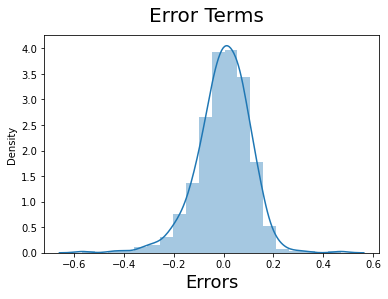

In [108]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)      
plt.show()

In [115]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-2.101097074103109e-15

## 7.Prediction on Test Set

### A. Applying Scaling on Test Set

In [109]:
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B.Splitting into X_test and y_test

In [110]:
y_test = df_test.pop('cnt')
X_test = df_test

### C. Making Predictions

In [113]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr_model5.predict(X_test_new)

## 8. Model Evaluation

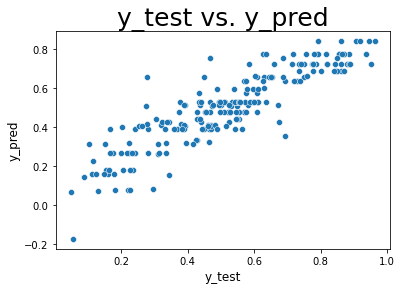

In [117]:
#Plot y_test against  y_pred
sns.scatterplot(y_test, y_test_pred)
plt.title("y_test vs. y_pred",fontsize=25)             
plt.xlabel('y_test',fontsize=12)                         
plt.ylabel('y_pred',fontsize=12)                      
plt.show()

### R2 Score Comparison

In [119]:
round(r2_score(y_true=y_train,y_pred=y_train_pred),3)

0.772

In [120]:
round(r2_score(y_true=y_test,y_pred=y_test_pred),3)

0.792

### Checking mean_squared_error

In [ ]:
#Importing mean_squared_error library

In [123]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09977622580531627

### Adjusted R2 Score Comparison

In [124]:
round(1-(1-r2_score(y_true=y_train,y_pred=y_train_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),3)

0.759

In [125]:
round(1-(1-r2_score(y_true=y_test,y_pred=y_test_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)

0.761

## Conclusion

- Analysis using Various features by RFE
- After that through VIF & 'P'value we are eliminating manually
- And finally we get the final regression

##### Now we can fitted the model with equation

#### cnt = 0.24 yr - 0.08 holiday - 0.11 dec - 0.10 jan - 0.11 nov + 0.066 sep - 0.33 light-snow_rain
#### - 0.06 misty - 0.26 spring - 0.05 summer 